In [135]:
# imports necessary modules
from pytorch_tabnet.tab_model import TabNetClassifier

import os
import torch
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler  # Corrected 'MinMaxScaler'
from sklearn.metrics import accuracy_score


# Preprocessing

In [136]:
data3=pd.read_csv('panc_Can_prot+')

In [137]:
drug_descriptors = ['PUTATIVE_TARGET','PATHWAY_NAME','Scaffold',	'CELL_LINE',	'DRUG_NAME',	'LN_IC50'	,'SMILES',
    'MolLogP', 'MolWt', 'HeavyAtomCount', 'HeavyAtomMolWt', 'NHOHCount', 'NOCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons',
    'NumAromaticRings', 'NumSaturatedRings', 'NumAliphaticRings', 'NumAromaticHeterocycles', 'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'RingCount', 'FractionCSP3', 'TPSA',
    'Largest_Ring_Size', 'Smallest_Ring_Size', 'pKa', 'Veber_Passes', 'Ghose_Passes', 'Muegge_Passes', 'Ro3_Passes', 'Egan_Passes', 'Ro2_Passes', 'Lipinski_Passes', 'Scaffold',
    'MolLogP_skf', 'MolWt_skf', 'HeavyAtomCount_skf', 'HeavyAtomMolWt_skf', 'NHOHCount_skf', 'NumHAcceptors_skf', 'NumHDonors_skf', 'NumHeteroatoms_skf', 'NumRotatableBonds_skf',
    'NumValenceElectrons_skf', 'NumAromaticRings_skf', 'NumSaturatedRings_skf', 'NumAliphaticRings_skf', 'NumAromaticHeterocycles_skf', 'NumSaturatedHeterocycles_skf',
    'NumAliphaticHeterocycles_skf', 'RingCount_skf', 'FractionCSP3_skf', 'TPSA_skf', 'pKa_skf']

In [138]:
selected=['CELL_LINE', 'DRUG_NAME','SMILES']

In [139]:
data=data3.drop(drug_descriptors,axis=1)

In [140]:
data.isna().sum()

# Display information about NaN values in the remaining columns #3
nan_info = data.isnull().sum().sort_values(ascending=False)
print(nan_info.head(50))

Class           0
MIMAT0001541    0
MIMAT0001630    0
MIMAT0001635    0
MIMAT0001631    0
MIMAT0004909    0
MIMAT0004910    0
MIMAT0001545    0
MIMAT0003327    0
MIMAT0001532    0
H3K4me0         0
MIMAT0001627    0
MIMAT0002814    0
MIMAT0001625    0
MIMAT0001536    0
MIMAT0003393    0
MIMAT0001341    0
MIMAT0004748    0
MIMAT0003885    0
MIMAT0004784    0
MIMAT0003150    0
MIMAT0002173    0
MIMAT0003161    0
MIMAT0002812    0
MIMAT0002807    0
MIMAT0004765    0
MIMAT0004764    0
MIMAT0002806    0
MIMAT0002805    0
MIMAT0004763    0
MIMAT0003180    0
MIMAT0002178    0
MIMAT0004762    0
MIMAT0002175    0
MIMAT0002176    0
MIMAT0002174    0
MIMAT0004761    0
MIMAT0001340    0
MIMAT0001339    0
MIMAT0003339    0
MIMAT0000724    0
MIMAT0000723    0
MIMAT0000722    0
MIMAT0001621    0
MIMAT0000721    0
MIMAT0000719    0
MIMAT0000710    0
MIMAT0000707    0
MIMAT0000705    0
MIMAT0004683    0
dtype: int64


In [141]:
data

,Class,H3K4me0,H3K4me1,H3K4me2,H3K4ac1,H3K9me0K14ac0,H3K9me1K14ac0,H3K9me2K14ac0,H3K9me3K14ac0,H3K9ac1K14ac0,...,MIMAT0002192,MIMAT0002191,MIMAT0002190,MIMAT0002189,MIMAT0002188,MIMAT0002187,MIMAT0002186,MIMAT0002185,MIMAT0010151,MIMAT0010150
0,0,0.195761,0.019582,0.266214,0.081958,0.600551,0.639993,0.421303,0.474403,0.845976,...,6.314878,6.584211,6.238978,7.117279,10.446887,5.911931,5.784242,6.488965,6.051807,7.041002
1,3,0.195761,0.019582,0.266214,0.081958,0.600551,0.639993,0.421303,0.474403,0.845976,...,6.314878,6.584211,6.238978,7.117279,10.446887,5.911931,5.784242,6.488965,6.051807,7.041002
2,3,0.195761,0.019582,0.266214,0.081958,0.600551,0.639993,0.421303,0.474403,0.845976,...,6.314878,6.584211,6.238978,7.117279,10.446887,5.911931,5.784242,6.488965,6.051807,7.041002
3,0,0.195761,0.019582,0.266214,0.081958,0.600551,0.639993,0.421303,0.474403,0.845976,...,6.314878,6.584211,6.238978,7.117279,10.446887,5.911931,5.784242,6.488965,6.051807,7.041002
4,0,0.195761,0.019582,0.266214,0.081958,0.600551,0.639993,0.421303,0.474403,0.845976,...,6.314878,6.584211,6.238978,7.117279,10.446887,5.911931,5.784242,6.488965,6.051807,7.041002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,3,0.038486,0.038215,-0.401776,0.372312,0.358149,0.275237,0.348969,-0.019828,0.132927,...,5.877499,6.295723,5.912889,6.030777,6.254934,6.046797,5.784766,6.386983,5.859473,6.254934
630,3,-0.058449,0.284198,0.562810,-4.886519,0.013273,0.222975,-0.188018,0.216183,0.153749,...,5.877499,6.984248,5.908092,6.231125,7.786662,6.156842,5.846243,6.751812,5.814550,6.682995
631,3,-0.408521,-0.372075,-0.228318,0.039593,-0.278988,-0.158762,0.002147,-0.286463,0.068664,...,6.420381,6.445925,6.091700,6.470700,8.581389,6.123708,5.789468,6.458284,5.939697,6.495215
632,3,-0.507166,-0.596770,-0.585153,-0.590579,0.070842,0.053380,-0.172921,0.517828,-0.561163,...,6.667608,7.097295,6.283181,6.779522,9.024364,6.252476,5.842476,6.385776,5.903038,6.608366


Below what we do is we select categorical columns and exclude them before normalizing

In [9]:
category=data[['PUTATIVE_TARGET','PATHWAY_NAME','Scaffold','NHOHCount','NOCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms',
       'NumRotatableBonds', 'NumAromaticRings','NumSaturatedRings', 'NumAliphaticRings', 'NumAromaticHeterocycles',
       'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'RingCount','Largest_Ring_Size', 'Smallest_Ring_Size', 
       'Veber_Passes', 'Ghose_Passes', 'Muegge_Passes', 'Ro3_Passes',
       'Egan_Passes', 'Ro2_Passes', 'Lipinski_Passes','NHOHCount_skf', 'NumHAcceptors_skf', 'NumHDonors_skf',  'NumHeteroatoms_skf', 'NumRotatableBonds_skf',
       'NumValenceElectrons_skf', 'NumAromaticRings_skf',
       'NumSaturatedRings_skf', 'NumAliphaticRings_skf',
       'NumAromaticHeterocycles_skf', 'NumSaturatedHeterocycles_skf',
       'NumAliphaticHeterocycles_skf', 'RingCount_skf']]

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Identify binary columns (columns with only 0 and 1 values)
binary_columns = [col for col in data.columns if set(data[col]) == {0, 1}]

# Columns to be normalized (excluding binary columns and 'category')
#columns_to_normalize = [col for col in data.columns if col not in binary_columns and col != 'category']

# Normalize the columns in the 'columns_to_normalize' list
#scaler = MinMaxScaler()
#data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Assign all other columns in 'category' as categorical
data[category.columns] = data[category.columns].astype('category')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder for each categorical column and transform the data
label_encoders = {}
for col in category:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


# Clustering and Visualization

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


X=data.drop('LN_IC50', axis=1)
y=data['LN_IC50']

# Calculate WCSS for different values of K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')

# Find the optimal K
optimal_k = 3  # Change this to your computed optimal K
plt.axvline(x=optimal_k, color='r', linestyle='--', label='Optimal K')  # Add a vertical line for the optimal K
plt.legend()  # Show legend
plt.show()


# UMAP and TSNE

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


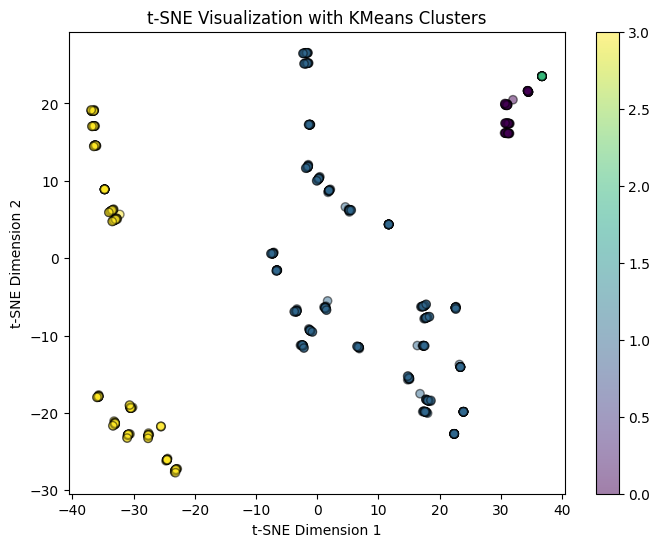

In [43]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from umap import UMAP
import matplotlib.pyplot as plt

# Assuming X is your feature matrix and y is your target variable
X = data.drop('LN_IC50', axis=1)
y = data['LN_IC50']

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

data3['Class']=cluster_labels

# Plot t-SNE visualization with KMeans clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5,edgecolors='k')
plt.title('t-SNE Visualization with KMeans Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()
plt.show()


In [68]:
data3.to_csv('pan+class.csv',index=False)

In [144]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

X = data.drop('Class', axis=1) #5
y = data['Class'].astype('category')

In [154]:
# Split the data into train and test sets
train_size = int(0.8 * len(data))
train_set = data[:train_size]
test_set = data[train_size:]

# Print the sizes of the train and test sets
print("Train set size:", len(train_set))
print("Test set size:", len(test_set))

Train set size: 507
Test set size: 127


In [155]:
from sklearn.model_selection import train_test_split #6
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,)

In [158]:
import xgboost as xgb

# Initialize and train the XGBoost classifier
XGBModel = xgb.XGBClassifier()
XGBModel.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [159]:
Y_pred_XGB = XGBModel.predict(X_test)

In [160]:
print("Confusion matrix of Y_pred_XG Boost:\n",confusion_matrix(Y_test,Y_pred_XGB))
print("F1 Score of Y_pred_XG Boost:\n",f1_score(Y_test,Y_pred_XGB,average='macro'))
print("Accuracy of Y_pred_XG Boost:\n", accuracy_score(Y_test,Y_pred_XGB))
print("Classification Report of Y_pred_XG Boost:\n",classification_report(Y_test,Y_pred_XGB))
print("---------------------------------------------------------")

Confusion matrix of Y_pred_XG Boost:
 [[ 0 16  0  0]
 [ 0 66  0  0]
 [ 0  2  0  0]
 [ 0 43  0  0]]
F1 Score of Y_pred_XG Boost:
 0.17098445595854922
Accuracy of Y_pred_XG Boost:
 0.5196850393700787
Classification Report of Y_pred_XG Boost:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.52      1.00      0.68        66
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        43

    accuracy                           0.52       127
   macro avg       0.13      0.25      0.17       127
weighted avg       0.27      0.52      0.36       127

---------------------------------------------------------


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


# Calculating Shap values for XAI

In [161]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

explainer = shap.Explainer(XGBModel)
shap_values = explainer.shap_values(X_test)

[15:44:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


Text(0.5, 1.0, 'Bee Swarm Plot')

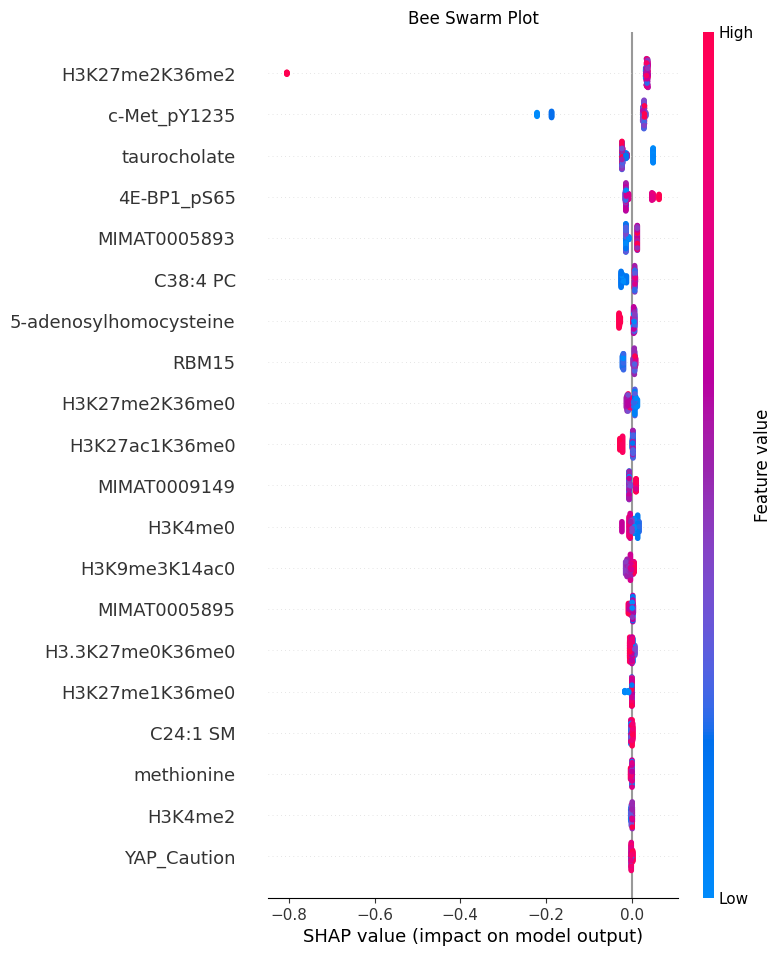

In [165]:
shap.summary_plot(shap_values[0], X_test, plot_type='dot', show=False)
plt.title('Bee Swarm Plot')

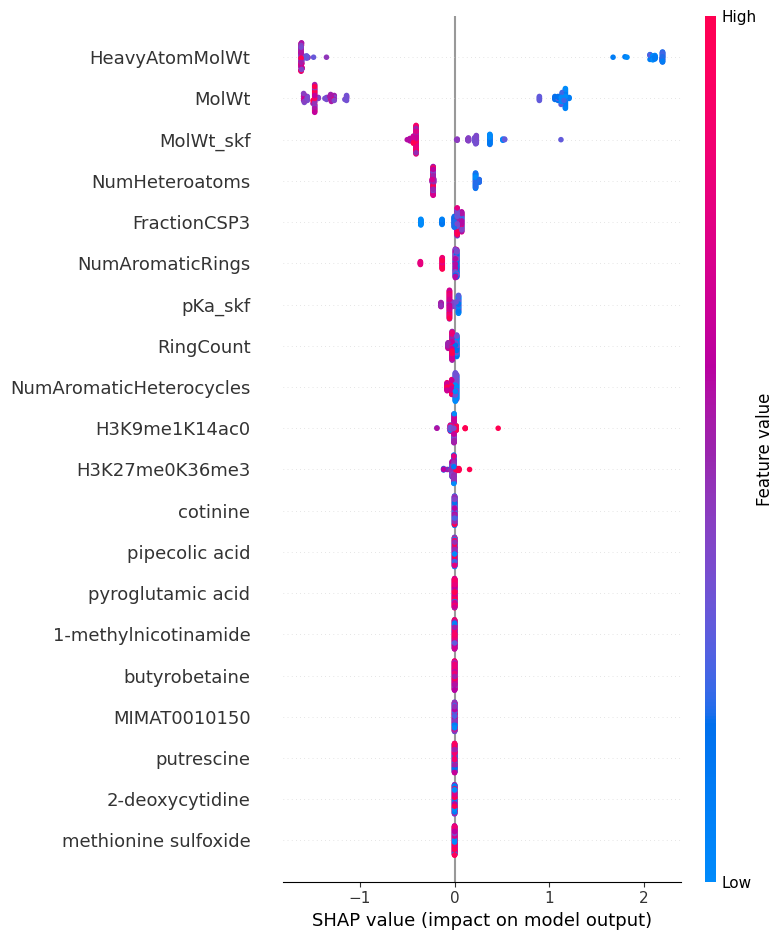

AttributeError: 'str' object has no attribute 'shape'

In [94]:

shap.summary_plot(shap_values[3], X_test, plot_type='dot')
plt.show()


# Hyperparameter Tuning using OPTUNA

In [62]:
import optuna
import numpy as np
from sklearn.model_selection import StratifiedKFold
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score

# Assuming X and y are your features and target variable
# Use StratifiedKFold for classification problems
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X = data.drop('Class', axis=1)
y = data['Class']

# Convert to numpy
X = X.to_numpy()
y = y.to_numpy().flatten()

def train_tabnet(X_train, y_train, X_val, y_val, params):
    tb_cls = TabNetClassifier(**params)
    tb_cls.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)],
               eval_name=['train', 'val'], eval_metric=['accuracy'],
               max_epochs=500, patience=250, batch_size=28, drop_last=False)
    return tb_cls

def objective(trial):
    accuracies = []
    
    for train_idx, val_idx in cv.split(X, y):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        params = {
            'n_d': trial.suggest_int('n_d', 8, 64),
            'n_a': trial.suggest_int('n_a', 8, 64),
            'n_steps': trial.suggest_int('n_steps', 1, 5),
            'gamma': trial.suggest_float('gamma', 1.0, 2.0),
            'n_independent': trial.suggest_int('n_independent', 1, 3),
            'n_shared': trial.suggest_int('n_shared', 1, 3),
            'lambda_sparse': trial.suggest_float('lambda_sparse', 1e-5, 1e-3),
            'optimizer_params': {'lr': trial.suggest_float('lr', 1e-4, 1e-2)},
            'scheduler_params': {'step_size': trial.suggest_int('step_size', 5, 15), 'gamma': trial.suggest_float('scheduler_gamma', 0.8, 0.99)},
            'mask_type': trial.suggest_categorical('mask_type', ['entmax', 'sparsemax'])
        }

        # Avoid certain combinations that might cause issues
        if params['n_steps'] < (params['n_independent'] + params['n_shared']):
            continue

        print("Current Hyperparameters:", params)

        tb_cls = train_tabnet(X_train, y_train, X_val, y_val, params)
        y_pred = tb_cls.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        accuracies.append(accuracy)

    mean_accuracy = np.mean(accuracies)
    return mean_accuracy

In [63]:
# Create Optuna study and perform optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

[I 2024-02-08 11:02:53,857] A new study created in memory with name: no-name-d9288201-fb27-4ed4-a5cb-3d081fc8b861
Mean of empty slice.
invalid value encountered in scalar divide
[W 2024-02-08 11:02:53,877] Trial 0 failed with parameters: {'n_d': 22, 'n_a': 46, 'n_steps': 1, 'gamma': 1.4167198010133277, 'n_independent': 1, 'n_shared': 3, 'lambda_sparse': 0.0008214406021756298, 'lr': 0.0015526948405360783, 'step_size': 13, 'scheduler_gamma': 0.9876410535456357, 'mask_type': 'sparsemax'} because of the following error: The value nan is not acceptable.
[W 2024-02-08 11:02:53,878] Trial 0 failed with value nan.
Mean of empty slice.
invalid value encountered in scalar divide
[W 2024-02-08 11:02:53,895] Trial 1 failed with parameters: {'n_d': 25, 'n_a': 62, 'n_steps': 3, 'gamma': 1.4471678381053954, 'n_independent': 1, 'n_shared': 3, 'lambda_sparse': 0.0007108171166484401, 'lr': 0.003747345034027639, 'step_size': 14, 'scheduler_gamma': 0.91633234361628, 'mask_type': 'entmax'} because of the f

Current Hyperparameters: {'n_d': 26, 'n_a': 24, 'n_steps': 3, 'gamma': 1.2978167962365834, 'n_independent': 2, 'n_shared': 1, 'lambda_sparse': 0.0006006097898545487, 'optimizer_params': {'lr': 0.005252254149150185}, 'scheduler_params': {'step_size': 5, 'gamma': 0.899115458970209}, 'mask_type': 'sparsemax'}
epoch 0  | loss: 2.30515 | train_accuracy: 0.42604 | val_accuracy: 0.3622  |  0:00:01s
epoch 1  | loss: 1.5159  | train_accuracy: 0.44379 | val_accuracy: 0.53543 |  0:00:01s
epoch 2  | loss: 1.17123 | train_accuracy: 0.50493 | val_accuracy: 0.55118 |  0:00:02s
epoch 3  | loss: 1.16447 | train_accuracy: 0.53452 | val_accuracy: 0.54331 |  0:00:03s
epoch 4  | loss: 1.16166 | train_accuracy: 0.48718 | val_accuracy: 0.53543 |  0:00:03s
epoch 5  | loss: 1.12308 | train_accuracy: 0.43787 | val_accuracy: 0.35433 |  0:00:04s
epoch 6  | loss: 1.06105 | train_accuracy: 0.55819 | val_accuracy: 0.51181 |  0:00:05s
epoch 7  | loss: 1.03639 | train_accuracy: 0.51874 | val_accuracy: 0.51969 |  0:00:

Best weights from best epoch are automatically used!


Current Hyperparameters: {'n_d': 26, 'n_a': 24, 'n_steps': 3, 'gamma': 1.2978167962365834, 'n_independent': 2, 'n_shared': 1, 'lambda_sparse': 0.0006006097898545487, 'optimizer_params': {'lr': 0.005252254149150185}, 'scheduler_params': {'step_size': 5, 'gamma': 0.899115458970209}, 'mask_type': 'sparsemax'}


Device used : cuda


epoch 0  | loss: 2.26953 | train_accuracy: 0.3432  | val_accuracy: 0.3622  |  0:00:00s
epoch 1  | loss: 1.43666 | train_accuracy: 0.46943 | val_accuracy: 0.47244 |  0:00:01s
epoch 2  | loss: 1.22706 | train_accuracy: 0.34714 | val_accuracy: 0.3937  |  0:00:02s
epoch 3  | loss: 1.17694 | train_accuracy: 0.48915 | val_accuracy: 0.48819 |  0:00:02s
epoch 4  | loss: 1.15012 | train_accuracy: 0.5286  | val_accuracy: 0.59843 |  0:00:03s
epoch 5  | loss: 1.09328 | train_accuracy: 0.56213 | val_accuracy: 0.56693 |  0:00:04s
epoch 6  | loss: 1.02744 | train_accuracy: 0.54832 | val_accuracy: 0.55118 |  0:00:04s
epoch 7  | loss: 1.07987 | train_accuracy: 0.53649 | val_accuracy: 0.56693 |  0:00:05s
epoch 8  | loss: 1.09296 | train_accuracy: 0.57002 | val_accuracy: 0.5748  |  0:00:06s
epoch 9  | loss: 1.07212 | train_accuracy: 0.54635 | val_accuracy: 0.55118 |  0:00:07s
epoch 10 | loss: 1.05367 | train_accuracy: 0.57002 | val_accuracy: 0.54331 |  0:00:07s
epoch 11 | loss: 1.02243 | train_accuracy: 

Best weights from best epoch are automatically used!


Current Hyperparameters: {'n_d': 26, 'n_a': 24, 'n_steps': 3, 'gamma': 1.2978167962365834, 'n_independent': 2, 'n_shared': 1, 'lambda_sparse': 0.0006006097898545487, 'optimizer_params': {'lr': 0.005252254149150185}, 'scheduler_params': {'step_size': 5, 'gamma': 0.899115458970209}, 'mask_type': 'sparsemax'}


Device used : cuda


epoch 0  | loss: 2.34111 | train_accuracy: 0.49901 | val_accuracy: 0.47244 |  0:00:00s
epoch 1  | loss: 1.47684 | train_accuracy: 0.51479 | val_accuracy: 0.49606 |  0:00:01s
epoch 2  | loss: 1.17166 | train_accuracy: 0.55227 | val_accuracy: 0.58268 |  0:00:02s
epoch 3  | loss: 1.17939 | train_accuracy: 0.53846 | val_accuracy: 0.52756 |  0:00:02s
epoch 4  | loss: 1.1155  | train_accuracy: 0.46351 | val_accuracy: 0.46457 |  0:00:03s
epoch 5  | loss: 1.13214 | train_accuracy: 0.51479 | val_accuracy: 0.49606 |  0:00:04s
epoch 6  | loss: 1.06523 | train_accuracy: 0.53452 | val_accuracy: 0.50394 |  0:00:05s
epoch 7  | loss: 1.08943 | train_accuracy: 0.51282 | val_accuracy: 0.45669 |  0:00:05s
epoch 8  | loss: 1.03896 | train_accuracy: 0.50296 | val_accuracy: 0.48031 |  0:00:06s
epoch 9  | loss: 1.01665 | train_accuracy: 0.56016 | val_accuracy: 0.54331 |  0:00:07s
epoch 10 | loss: 0.95526 | train_accuracy: 0.61736 | val_accuracy: 0.64567 |  0:00:07s
epoch 11 | loss: 0.93091 | train_accuracy: 

Best weights from best epoch are automatically used!


Current Hyperparameters: {'n_d': 26, 'n_a': 24, 'n_steps': 3, 'gamma': 1.2978167962365834, 'n_independent': 2, 'n_shared': 1, 'lambda_sparse': 0.0006006097898545487, 'optimizer_params': {'lr': 0.005252254149150185}, 'scheduler_params': {'step_size': 5, 'gamma': 0.899115458970209}, 'mask_type': 'sparsemax'}


Device used : cuda


epoch 0  | loss: 2.21795 | train_accuracy: 0.52268 | val_accuracy: 0.48031 |  0:00:00s
epoch 1  | loss: 1.38444 | train_accuracy: 0.51085 | val_accuracy: 0.51969 |  0:00:01s
epoch 2  | loss: 1.18503 | train_accuracy: 0.57396 | val_accuracy: 0.58268 |  0:00:02s
epoch 3  | loss: 1.1524  | train_accuracy: 0.2288  | val_accuracy: 0.2126  |  0:00:02s
epoch 4  | loss: 1.13561 | train_accuracy: 0.34517 | val_accuracy: 0.38583 |  0:00:03s
epoch 5  | loss: 1.06687 | train_accuracy: 0.53846 | val_accuracy: 0.51969 |  0:00:04s
epoch 6  | loss: 1.04409 | train_accuracy: 0.50099 | val_accuracy: 0.45669 |  0:00:05s
epoch 7  | loss: 1.03347 | train_accuracy: 0.35306 | val_accuracy: 0.35433 |  0:00:05s
epoch 8  | loss: 1.05465 | train_accuracy: 0.51282 | val_accuracy: 0.51969 |  0:00:06s
epoch 9  | loss: 1.0182  | train_accuracy: 0.53057 | val_accuracy: 0.48031 |  0:00:07s
epoch 10 | loss: 1.02721 | train_accuracy: 0.54832 | val_accuracy: 0.55906 |  0:00:07s
epoch 11 | loss: 0.98112 | train_accuracy: 

Best weights from best epoch are automatically used!


Current Hyperparameters: {'n_d': 26, 'n_a': 24, 'n_steps': 3, 'gamma': 1.2978167962365834, 'n_independent': 2, 'n_shared': 1, 'lambda_sparse': 0.0006006097898545487, 'optimizer_params': {'lr': 0.005252254149150185}, 'scheduler_params': {'step_size': 5, 'gamma': 0.899115458970209}, 'mask_type': 'sparsemax'}


Device used : cuda


epoch 0  | loss: 2.32242 | train_accuracy: 0.23425 | val_accuracy: 0.18254 |  0:00:00s
epoch 1  | loss: 1.39523 | train_accuracy: 0.4685  | val_accuracy: 0.44444 |  0:00:01s
epoch 2  | loss: 1.24134 | train_accuracy: 0.58071 | val_accuracy: 0.59524 |  0:00:01s
epoch 3  | loss: 1.17789 | train_accuracy: 0.5748  | val_accuracy: 0.5873  |  0:00:02s
epoch 4  | loss: 1.12314 | train_accuracy: 0.44488 | val_accuracy: 0.38889 |  0:00:03s
epoch 5  | loss: 1.11398 | train_accuracy: 0.54134 | val_accuracy: 0.54762 |  0:00:03s
epoch 6  | loss: 1.09556 | train_accuracy: 0.55512 | val_accuracy: 0.53968 |  0:00:04s
epoch 7  | loss: 1.07631 | train_accuracy: 0.57874 | val_accuracy: 0.59524 |  0:00:05s
epoch 8  | loss: 1.09824 | train_accuracy: 0.51969 | val_accuracy: 0.54762 |  0:00:06s
epoch 9  | loss: 0.99874 | train_accuracy: 0.57283 | val_accuracy: 0.59524 |  0:00:06s
epoch 10 | loss: 1.01675 | train_accuracy: 0.58268 | val_accuracy: 0.57143 |  0:00:07s
epoch 11 | loss: 0.95586 | train_accuracy: 

Best weights from best epoch are automatically used!
[I 2024-02-08 11:54:49,471] Trial 2 finished with value: 0.988976377952756 and parameters: {'n_d': 26, 'n_a': 24, 'n_steps': 3, 'gamma': 1.2978167962365834, 'n_independent': 2, 'n_shared': 1, 'lambda_sparse': 0.0006006097898545487, 'lr': 0.005252254149150185, 'step_size': 5, 'scheduler_gamma': 0.899115458970209, 'mask_type': 'sparsemax'}. Best is trial 2 with value: 0.988976377952756.
Mean of empty slice.
invalid value encountered in scalar divide
[W 2024-02-08 11:54:49,488] Trial 3 failed with parameters: {'n_d': 29, 'n_a': 61, 'n_steps': 2, 'gamma': 1.282197889553979, 'n_independent': 2, 'n_shared': 2, 'lambda_sparse': 0.0005149018010701544, 'lr': 0.006429801856714884, 'step_size': 7, 'scheduler_gamma': 0.9046241891331825, 'mask_type': 'sparsemax'} because of the following error: The value nan is not acceptable.
[W 2024-02-08 11:54:49,488] Trial 3 failed with value nan.
Mean of empty slice.
invalid value encountered in scalar divid

In [64]:

# Get the top 3 sets of hyperparameters
top_hyperparameters = [study.best_params for _ in range(3)]

In [65]:
def train_tabnet(X_train, y_train, X_val, y_val, params):
    # Remove 'lr' from params and set it in 'optimizer_params'
    lr = params.pop('lr', 0.01)
    params['optimizer_params'] = {'lr': lr}

    tb_cls = TabNetClassifier(**params)
    tb_cls.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)],
               eval_name=['train', 'val'], eval_metric=['accuracy'],
               max_epochs=500, patience=250, batch_size=28, drop_last=False)
    return tb_cls

In [66]:
def train_tabnet(X_train, y_train, X_val, y_val, params):
    # Extract 'lr', 'step_size', and 'gamma' from params
    lr = params.pop('lr', 0.01)
    step_size = params.pop('step_size', 10)
    gamma = params.pop('scheduler_gamma', 0.9)

    # Set 'lr' in 'optimizer_params' and 'step_size', 'gamma' in 'scheduler_params'
    params['optimizer_params'] = {'lr': lr}
    params['scheduler_params'] = {'step_size': step_size, 'gamma': gamma}

    tb_cls = TabNetClassifier(**params)
    tb_cls.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)],
               eval_name=['train', 'val'], eval_metric=['accuracy'],
               max_epochs=500, patience=250, batch_size=28, drop_last=False)
    return tb_cls

In [ ]:
# Train TabNet models with the top hyperparameters
models = [train_tabnet(X_train, y_train, X_val, y_val, params) for params in top_hyperparameters]

In [31]:
# Make predictions with each model on the test set
ensemble_predictions = [model.predict(X_val) for model in models]

In [36]:
# Create the ensemble prediction by taking a majority vote
ensemble_prediction = np.round(np.mean(ensemble_predictions, axis=0))

In [37]:

# Evaluate the ensemble performance
ensemble_accuracy = accuracy_score(y_val, ensemble_prediction)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 0.7738095238095238


Accuract=0.81186
Current Hyperparameters: {'n_d': 11, 'n_a': 51, 'n_steps': 4, 'gamma': 1.3693476462780634, 'n_independent': 1, 'n_shared': 2, 'lambda_sparse': 0.0008520830387136657, 'optimizer_params': {'lr': 0.0021648403904827597}, 'scheduler_params': {'step_size': 8, 'gamma': 0.9697350941197418}, 'mask_type': 'entmax'}

Accuract=0.81186
Current Hyperparameters: {'n_d': 61, 'n_a': 38, 'n_steps': 4, 'gamma': 1.5402472621295757, 'n_independent': 2, 'n_shared': 1, 'lambda_sparse': 2.5669155463425107e-05, 'optimizer_params': {'lr': 0.008420606758416865}, 'scheduler_params': {'step_size': 12, 'gamma': 0.8314991690581173}, 'mask_type': 'entmax'}

Accuracy 0.83529
Current Hyperparameters: {'n_d': 61, 'n_a': 38, 'n_steps': 4, 'gamma': 1.5402472621295757, 'n_independent': 2, 'n_shared': 1, 'lambda_sparse': 2.5669155463425107e-05, 'optimizer_params': {'lr': 0.008420606758416865}, 'scheduler_params': {'step_size': 12, 'gamma': 0.8314991690581173}, 'mask_type': 'entmax'}

Accuracy= 0.88235
Current Hyperparameters: {'n_d': 61, 'n_a': 38, 'n_steps': 4, 'gamma': 1.5402472621295757, 'n_independent': 2, 'n_shared': 1, 'lambda_sparse': 2.5669155463425107e-05, 'optimizer_params': {'lr': 0.008420606758416865}, 'scheduler_params': {'step_size': 12, 'gamma': 0.8314991690581173}, 'mask_type': 'entmax'}

Accuracy= 0.82
Current Hyperparameters: {'n_d': 61, 'n_a': 13, 'n_steps': 4, 'gamma': 1.4510873810959715, 'n_independent': 1, 'n_shared': 2, 'lambda_sparse': 0.0003951135701299418, 'optimizer_params': {'lr': 0.008977000829154959}, 'scheduler_params': {'step_size': 15, 'gamma': 0.9852173741627945}, 'mask_type': 'entmax'}

Clean code

In [ ]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import StratifiedKFold
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Load data
data = pd.read_csv("drugALLomics_merge.csv")
selected = ['CELL_LINE', 'DRUG_NAME', 'PUTATIVE_TARGET', 'PATHWAY_NAME', 'LN_IC50', 'SMILES', 'Class']
data = data.drop(selected, axis=1)
category = data[['NHOHCount', 'NOCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms',
                 'NumRotatableBonds', 'NumAromaticRings', 'NumSaturatedRings', 'NumAliphaticRings',
                 'NumAromaticHeterocycles', 'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles',
                 'RingCount', 'Largest_Ring_Size', 'Smallest_Ring_Size', 'Veber_Passes', 'Ghose_Passes',
                 'Muegge_Passes', 'Ro3_Passes', 'Egan_Passes', 'Ro2_Passes', 'Lipinski_Passes',
                 'NHOHCount_skf', 'NumHAcceptors_skf', 'NumHDonors_skf', 'NumHeteroatoms_skf',
                 'NumRotatableBonds_skf', 'NumValenceElectrons_skf', 'NumAromaticRings_skf',
                 'NumSaturatedRings_skf', 'NumAliphaticRings_skf', 'NumAromaticHeterocycles_skf',
                 'NumSaturatedHeterocycles_skf', 'NumAliphaticHeterocycles_skf', 'RingCount_skf', 'cluster']]

# Identify binary columns
binary_columns = [col for col in data.columns if set(data[col]) == {0, 1}]

# Columns to be normalized
columns_to_normalize = [col for col in data.columns if col not in binary_columns and col != 'cluster']

# Normalize the columns
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Convert to numpy
X = data.drop('cluster', axis=1).to_numpy()
y = data['cluster'].to_numpy().flatten()

# Use StratifiedKFold for classification problems
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def train_tabnet(X_train, y_train, X_val, y_val, params):
    # Extract 'lr', 'step_size', and 'gamma' from params
    lr = params.pop('lr', 0.01)
    step_size = params.pop('step_size', 10)
    gamma = params.pop('scheduler_gamma', 0.9)

    # Set 'lr' in 'optimizer_params' and 'step_size', 'gamma' in 'scheduler_params'
    params['optimizer_params'] = {'lr': lr}
    params['scheduler_params'] = {'step_size': step_size, 'gamma': gamma}

    tb_cls = TabNetClassifier(**params)
    tb_cls.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)],
               eval_name=['train', 'val'], eval_metric=['accuracy'],
               max_epochs=500, patience=250, batch_size=28, drop_last=False)
    return tb_cls

def objective(trial):
    accuracies = []
    
    for train_idx, val_idx in cv.split(X, y):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        params = {
            'n_d': trial.suggest_int('n_d', 8, 64),
            'n_a': trial.suggest_int('n_a', 8, 64),
            'n_steps': trial.suggest_int('n_steps', 1, 5),
            'gamma': trial.suggest_float('gamma', 1.0, 2.0),
            'n_independent': trial.suggest_int('n_independent', 1, 3),
            'n_shared': trial.suggest_int('n_shared', 1, 3),
            'lambda_sparse': trial.suggest_float('lambda_sparse', 1e-5, 1e-3),
            'optimizer_params': {'lr': trial.suggest_float('lr', 1e-4, 1e-2)},
            'scheduler_params': {'step_size': trial.suggest_int('step_size', 5, 15),
                                 'gamma': trial.suggest_float('scheduler_gamma', 0.8, 0.99)},
            'mask_type': trial.suggest_categorical('mask_type', ['entmax', 'sparsemax'])
        }

        # Avoid certain combinations that might cause issues
        if params['n_steps'] < (params['n_independent'] + params['n_shared']):
            continue

        print("Current Hyperparameters:", params)

        tb_cls = train_tabnet(X_train, y_train, X_val, y_val, params)
        y_pred = tb_cls.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        accuracies.append(accuracy)

    mean_accuracy = np.mean(accuracies)
    return mean_accuracy

# Create Optuna study and perform optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=6)

# Get the top 3 sets of hyperparameters with accuracies above 0.88
top_hyperparameters = []
for i, trial in enumerate(study.trials):
    if trial.value > 0.85 and len(top_hyperparameters) < 3:
        top_hyperparameters.append(trial.params)

# Initialize variables to store train and validation sets
X_train_list, y_train_list, X_val_list, y_val_list = [], [], [], []

# Split the data using StratifiedKFold
for train_idx, val_idx in cv.split(X, y):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    X_train_list.append(X_train)
    y_train_list.append(y_train)
    X_val_list.append(X_val)
    y_val_list.append(y_val)

# Train TabNet models with the top hyperparameters
models = [train_tabnet(X_train, y_train, X_val, y_val, params) for params in top_hyperparameters]

# Make predictions with each model on the validation set
ensemble_predictions = [model.predict(X_val) for model in models]

# Create the ensemble prediction by taking a majority vote
ensemble_prediction = np.round(np.mean(ensemble_predictions, axis=0))

# Evaluate the ensemble performance
ensemble_accuracy = accuracy_score(y_val, ensemble_prediction)
ensemble_recall = recall_score(y_val, ensemble_prediction)

print("Ensemble Accuracy:", ensemble_accuracy)
print("Ensemble Recall:", ensemble_recall)

In [ ]:
print("Ensemble F1:", f1_score)